# Determination of lightning length from light curves

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd
from scipy.signal import find_peaks
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [7]:
raise
'''
d = [{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009}
#"/storage/experiments/2021/0713_bourka_exit29_D8",\
#"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky
    ]
'''
d = [\
{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943, 'day':True},\
{'dir':"/storage/experiments/2021/0609_bourka_sobeslav",'snap':348.1999993, 'day':True},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0714_bourka_martin",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0714_bourka_sobeslav",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0725_bourka_ratmirov",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0726_bourka_zabori",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0803_bourka_votice",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0807_bourka_sobeslav",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto1",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto0",'snap':620.2000009}, 'day':True,\
{'dir':"/storage/experiments/2021/0816_bourka_sobeslav",'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0822_bourka_sobeslav_auto0",'snap':620.2000009, 'day':True}]
#'''

files = pd.DataFrame( columns=['name', 'duration'])

WINDOW_SIZE = 100

for directory in d:
    print(directory['dir'],directory['snap'])

    for f in glob.iglob(directory['dir'] + "/video/x/*.csv"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        ss = f.split('.')
        sss= (ss[0]+'.'+ss[1]).split('/x')
        ff = sss[0]+sss[1]
        
        snap = directory['snap'] 
        
        # Import light curve
        light_curve = pd.read_csv(f, names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        #signal_samples=light_curve[["illuminance"]].to_numpy()
        maximum = max(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        minimum = min(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        amplitude = maximum - minimum
        stddev = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].std()
        avg = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].mean()
        print(minimum, maximum, avg, stddev)
        peaks, properties = find_peaks(light_curve["illuminance"], prominence = 8*stddev, wlen=WINDOW_SIZE)
        #xx = light_curve["illuminance"].rolling(100).mean()
        try:
            print(properties["prominences"].min(), properties["prominences"].max())

            peaks = peaks[peaks > 100]
            files = files.append({'name':f,'duration':round((peaks[-1] - peaks[0]) * snap /1000000, 3)}, ignore_index=True)
            print(round((peaks[-1] - peaks[0]) * snap /1000000, 3), 's')
        except:
            pass        
        
        #peaks, _ = find_peaks(light_curve["illuminance"], prominence = properties["prominences"].max())
        
        try:
            plt.figure(figsize=(15,1))
            plt.yscale('log')
            #plt.plot(signal_samples,c='gray')
            plt.plot(light_curve["illuminance"],c='gray')
            #plt.plot(xx,c='red')
            #plt.ylim(minimum,minimum+(maximum-minimum)/5)
            plt.plot(peaks,light_curve[["illuminance"]].iloc[peaks], ls='', marker='+', color='red')
            plt.axvspan(peaks[0],peaks[-1],alpha=0.3)
            #plt.plot(light_curve["illuminance"].loc[light_curve["illuminance"]>(avg+stddev/2)], color='red')
            #plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
            plt.title(f)
            plt.show()
        except:
            pass

RuntimeError: No active exception to reraise

/storage/experiments/2021/0605_bourka_radosovice 564.9549943 True
835638.0 34787160.0 35622798.0 35210170.71 172219.85794604363
1914366.0 97762914.0
0.06 s


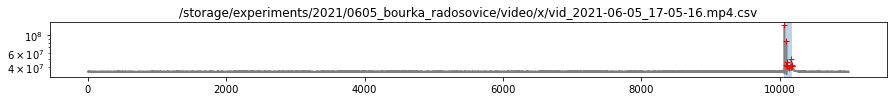

620265.0 56294370.0 56914635.0 56589357.06 125433.36966183932
1454031.0 3372783.0
0.327 s


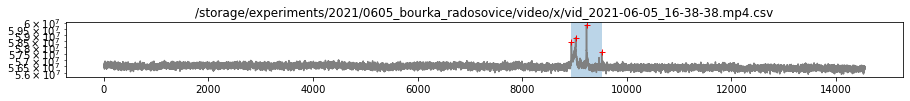

956625.0 37908177.0 38864802.0 38418513.0 184854.53813102984
47673930.0 47673930.0
0.0 s


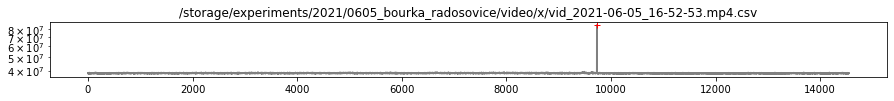

/storage/experiments/2021/0609_bourka_sobeslav 348.1999993 True
230886.0 65179521.0 65410407.0 65298577.8 46812.298304456875
713928.0 10041138.0
0.349 s


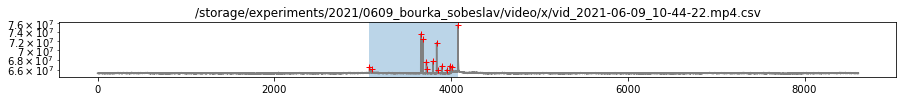

249795.0 67537986.0 67787781.0 67675103.01 46438.84185200418
3056298.0 58815726.0
0.018 s


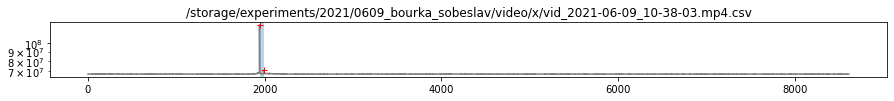

169701.0 81334731.0 81504432.0 81423659.07 38965.952188347015
342783.0 9773232.0
0.155 s


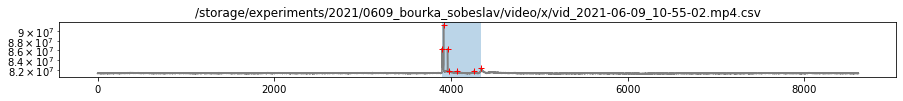

206859.0 72445710.0 72652569.0 72557004.12 40826.099080946646
735522.0 32193840.0
0.353 s


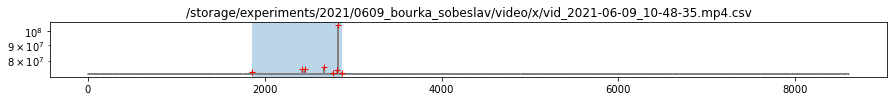

/storage/experiments/2021/0711_bourka_stiavnica 620.2000009 True
454686.0 175699143.0 176153829.0 175930109.53 97985.3785865864
973695.0 87790919.0
0.363 s


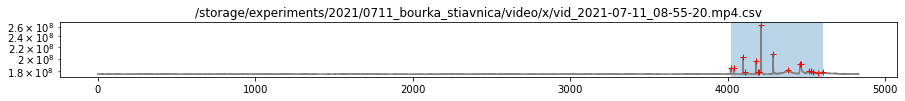

674848.0 104803205.0 105478053.0 105045314.65 143435.69830791175
1368767.0 18456382.0
0.416 s


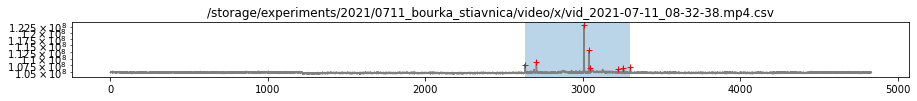

1062684.0 170061267.0 171123951.0 170497986.56 236426.23846402683
2174617.0 41051880.0
0.742 s


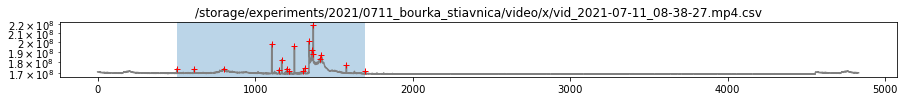

380968.0 203275553.0 203656521.0 203447746.1 77328.86129186806
772545.0 19668976.0
0.922 s


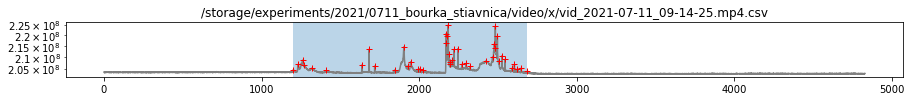

636907.0 122072195.0 122709102.0 122369390.23 141930.31058396836
1296910.0 161377355.0
1.192 s


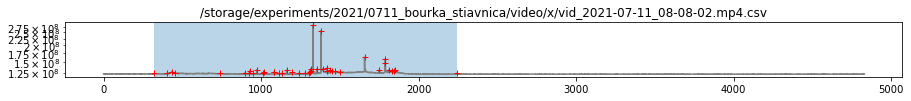

343665.0 214268400.0 214612065.0 214446572.22 80884.64075928874
721758.0 11244557.0
0.754 s


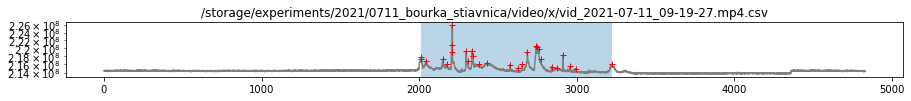

644041.0 104381462.0 105025503.0 104716781.7 144994.47858992996
1367396.0 18448947.0
0.416 s


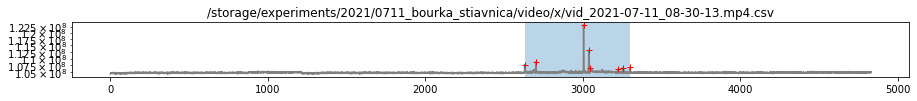

699779.0 81620480.0 82320259.0 82004670.01 167912.0741293914
1805594.0 171718781.0
0.548 s


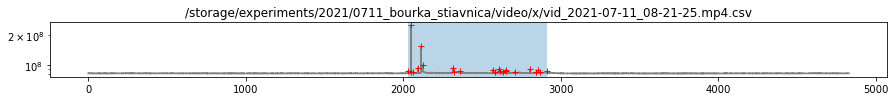

377728.0 196509190.0 196886918.0 196704316.1 82418.11382490228
768744.0 32682631.0
1.069 s


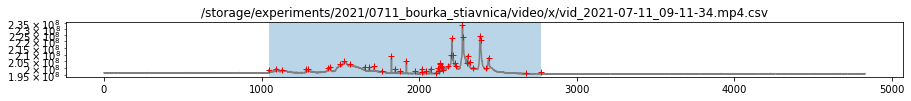

504371.0 120395090.0 120899461.0 120647763.38 128719.3004719003
1833891.0 3321298.0
0.131 s


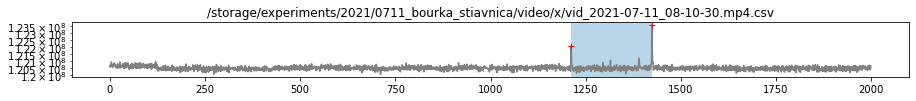

742689.0 111782653.0 112525342.0 112210496.17 138127.3420429847
1878666.0 79577846.0
0.634 s


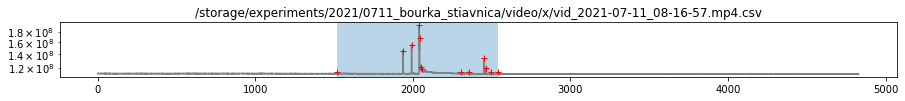

829324.0 102722725.0 103552049.0 103089367.27 148968.1745991103
1758458.0 176860059.0
0.316 s


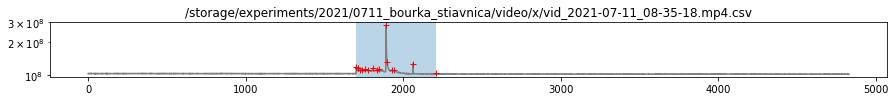

16103664.0 171739407.0 187843071.0 172429837.63 1636247.8167921645
10108024.0 162041453.0 172149477.0 165021341.51 4341692.479227932
32635815.0 126091417.0
0.08 s


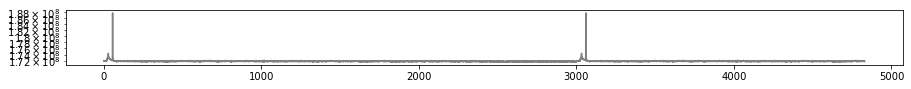

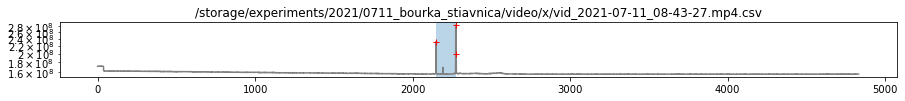

617461.0 117565139.0 118182600.0 117871078.02 150434.92741985744
1424954.0 81891234.0
0.608 s


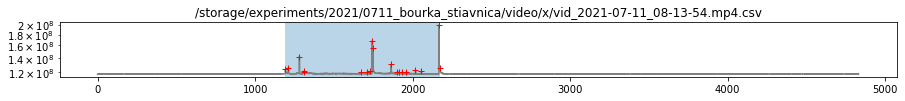

456991.0 209352691.0 209809682.0 209589026.46 90685.6734335104
5767495.0 19267119.0
0.036 s


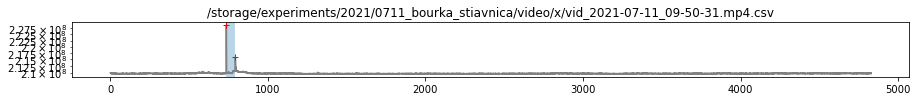

334571.0 214233229.0 214567800.0 214402258.64 77507.23687534544
686061.0 11238349.0
0.754 s


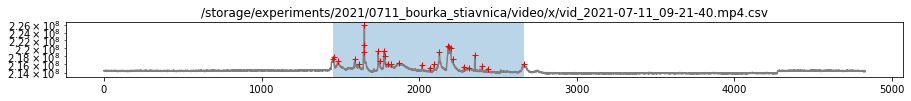

428548.0 204310089.0 204738637.0 204530810.54 84282.15273247715
1151781.0 24667493.0
0.263 s


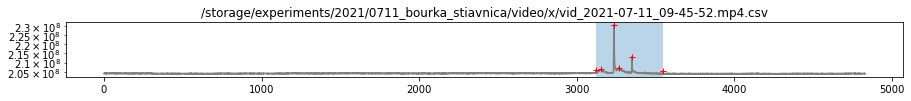

594516.0 110032301.0 110626817.0 110291200.72 129339.73506618726
1201221.0 75511589.0
0.432 s


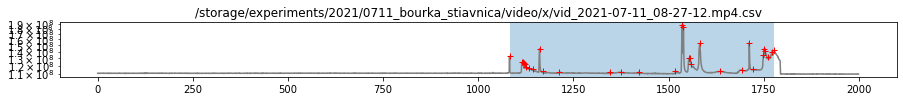

506004.0 156170373.0 156676377.0 156408706.07 108779.68175793994
1014957.0 164824970.0
0.58 s


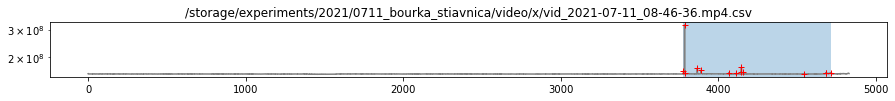

410895.0 183236357.0 183647252.0 183430570.36 96436.83063256976
859436.0 56988491.0
0.306 s


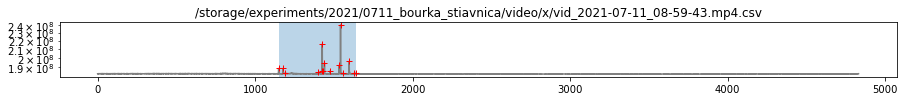

/storage/experiments/2021/0714_bourka_martin 620.2000009 True
672433.0 90102704.0 90775137.0 90452579.66 165015.82933107545
1572016.0 71756543.0
0.736 s


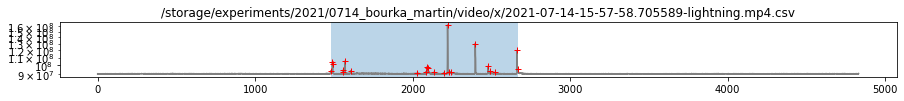

564981.0 121706074.0 122271055.0 121998692.31 124821.01710256608
1423320.0 7727369.0
0.693 s


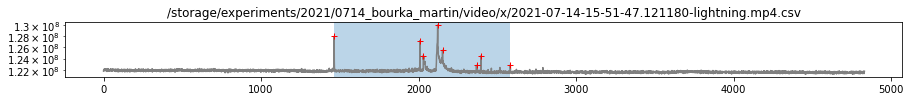

535863.0 113298212.0 113834075.0 113540324.78 122587.0665710562
1185193.0 58629835.0
1.221 s


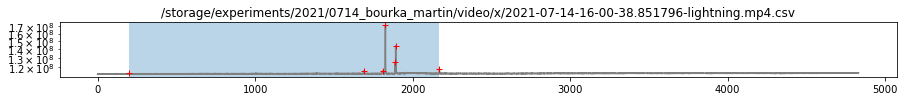

652504.0 99046897.0 99699401.0 99388097.88 141578.03743927646
1318591.0 57580648.0
0.804 s


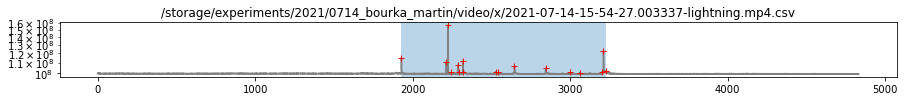

/storage/experiments/2021/0714_bourka_sobeslav 620.2000009 True
733410.0 93535533.0 94268943.0 93892919.55 228961.3820980517
1468416.0 14502006.0
0.525 s


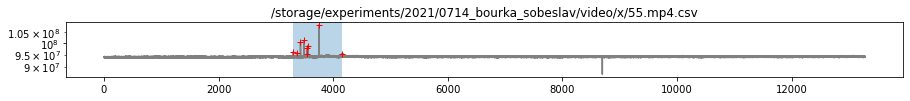

/storage/experiments/2021/0725_bourka_ratmirov 620.2000009 False
16140.0 99672.0 115812.0 104670.03 2532.1467175286093
34902.0 117235887.0
0.465 s


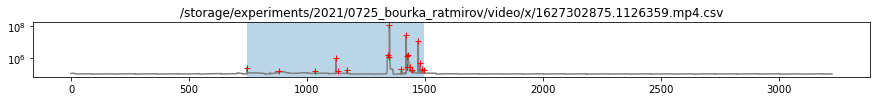

29367.0 328989.0 358356.0 343084.92 5576.282266235027
73224.0 3543588.0
0.363 s


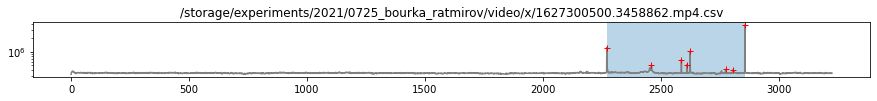

13926.0 99312.0 113238.0 102680.73 2282.2529178224513
62589.0 7758900.0
0.343 s


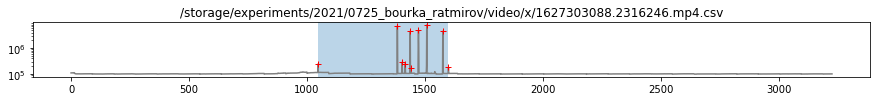

73503.0 1324158.0 1397661.0 1351388.25 11379.740605567422
147774.0 39634548.0
0.538 s


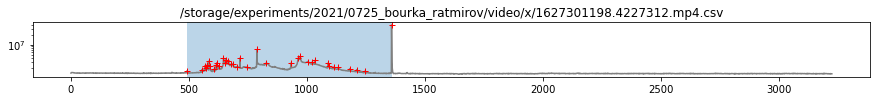

32964.0 643617.0 676581.0 659930.67 6469.990120759634
67668.0 218121138.0
1.102 s


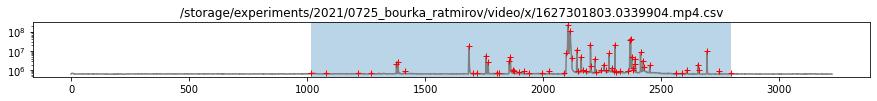

37899.0 323709.0 361608.0 341013.33 6977.630789562782
76200.0 68241537.0
0.729 s


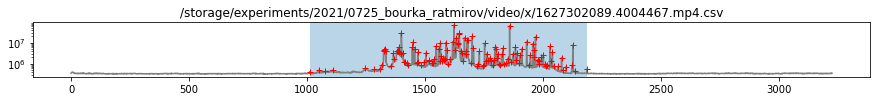

80988.0 1670769.0 1751757.0 1701504.06 14474.010915995734
167364.0 36305016.0
0.923 s


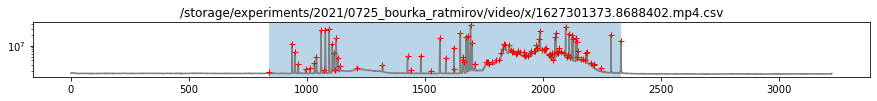

52593.0 791826.0 844419.0 818548.29 10511.841109002222
109335.0 58656978.0
0.527 s


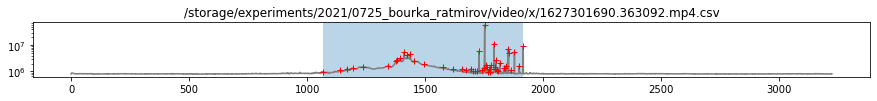

38526.0 374595.0 413121.0 389879.31 6796.136507471124
77985.0 107555949.0
1.145 s


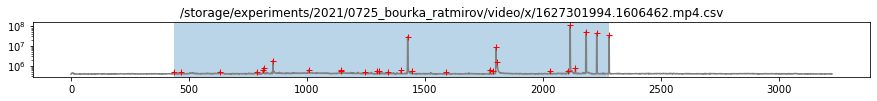

42537.0 1167213.0 1209750.0 1185212.4 7879.878610047932
87891.0 21703023.0
0.564 s


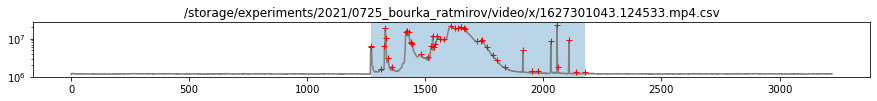

18294.0 102786.0 121080.0 111246.84 3266.8665576442736
37881.0 42039702.0
0.44 s


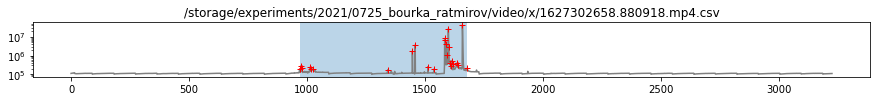

35151.0 199794.0 234945.0 211770.69 6173.810490583299
72774.0 135712383.0
1.025 s


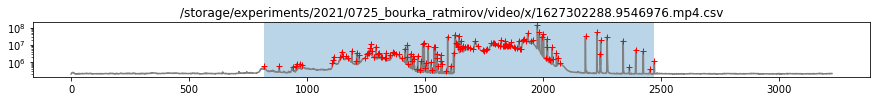

15651.0 98715.0 114366.0 102784.83 2180.01217240138
31581.0 205093020.0
1.418 s


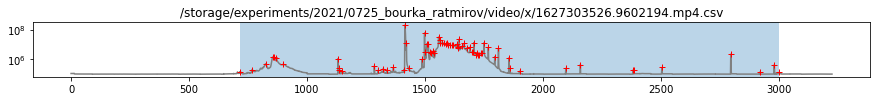

56697.0 926496.0 983193.0 942842.4 10828.054261542517
114180.0 77184933.0
0.914 s


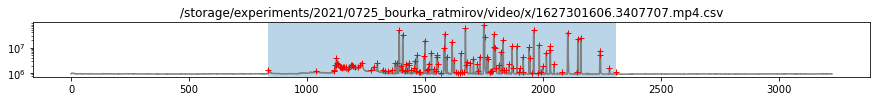

26037.0 258390.0 284427.0 267322.02 5430.397795909448
59133.0 125672592.0
0.571 s


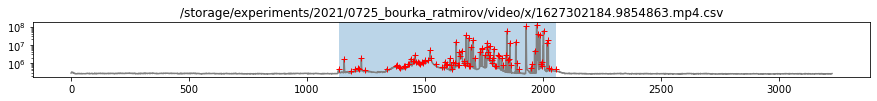

17124.0 96777.0 113901.0 102747.48 2447.6553426419405
72015.0 97072131.0
0.806 s


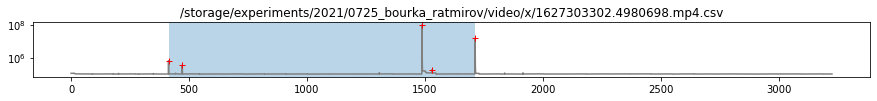

82068.0 2181726.0 2263794.0 2227410.69 14651.065247371174
164292.0 93125370.0
1.42 s


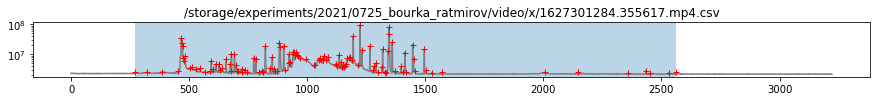

75372.0 1137027.0 1212399.0 1169551.02 14704.024428830237
156039.0 172024722.0
0.708 s


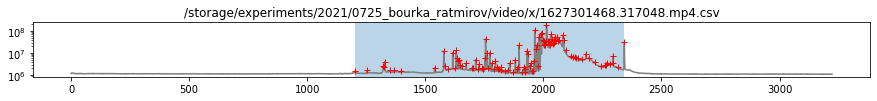

12222.0 100008.0 112230.0 108971.76 3148.13990332531
25926.0 133354503.0
0.785 s


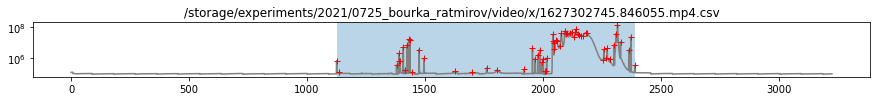

/storage/experiments/2021/0726_bourka_zabori 620.2000009 True
276654.0 69369033.0 69645687.0 69494881.56 48255.35646665182
600621.0 5617824.0
0.485 s


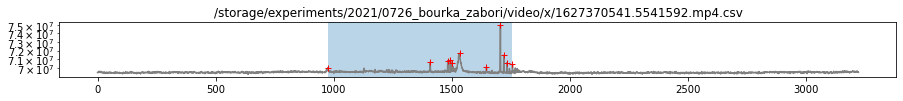

211995.0 92095617.0 92307612.0 92212925.19 43789.31029342248
425445.0 15436269.0
0.458 s


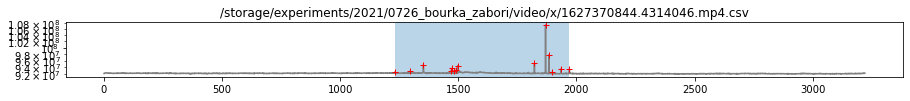

271230.0 100603716.0 100874946.0 100721765.79 44942.538011948716
552627.0 778848.0
0.104 s


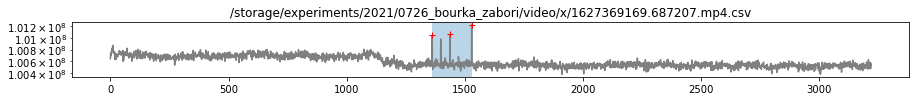

211959.0 121384665.0 121596624.0 121520302.83 38461.84392330805
469749.0 1380795.0
0.277 s


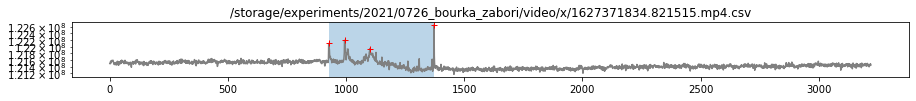

384963.0 49337757.0 49722720.0 49526284.68 71710.23180870483
1267515.0 4222794.0
0.112 s


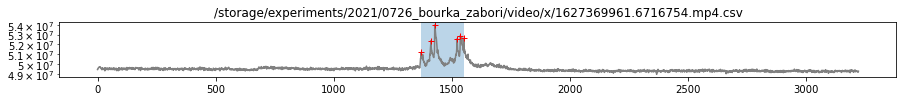

295440.0 48044784.0 48340224.0 48206885.16 61884.07744996064
665550.0 2453649.0
0.539 s


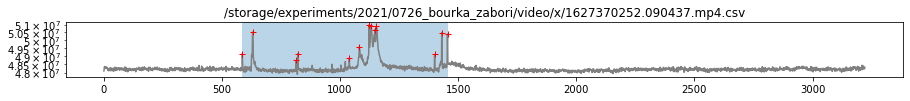

/storage/experiments/2021/0803_bourka_votice 620.2000009 True
287337.0 99161460.0 99448797.0 99276232.83 47881.69289916554
834306.0 3330465.0
0.174 s


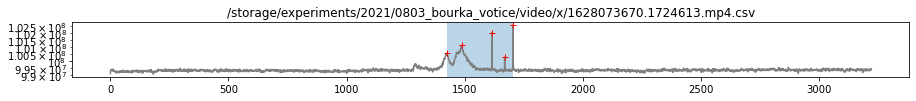

251802.0 125664009.0 125915811.0 125789286.39 39595.53416199402
504444.0 42830115.0
0.571 s


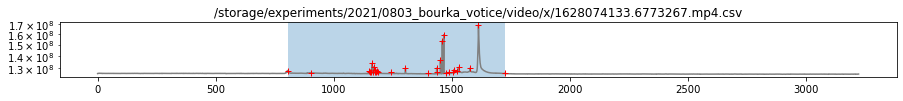

/storage/experiments/2021/0807_bourka_sobeslav 620.2000009 False
293604.0 151276737.0 151570341.0 151407911.94 62476.86679080795
622680.0 56780214.0
0.961 s


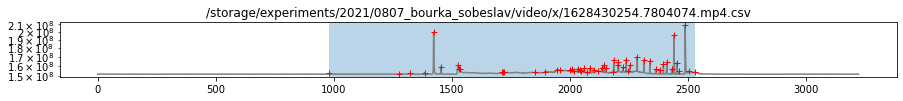

259371.0 151271364.0 151530735.0 151389682.65 51048.04023373029
542223.0 34899291.0
0.776 s


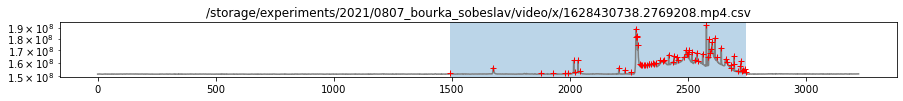

274632.0 151484178.0 151758810.0 151650228.06 49353.16515221509
579510.0 5057370.0
0.897 s


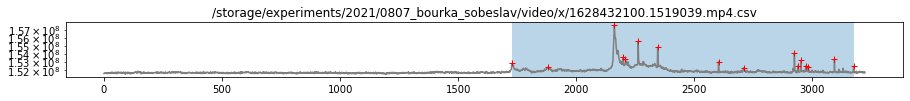

270546.0 151472241.0 151742787.0 151576428.63 46508.90579290848
554823.0 39583551.0
0.414 s


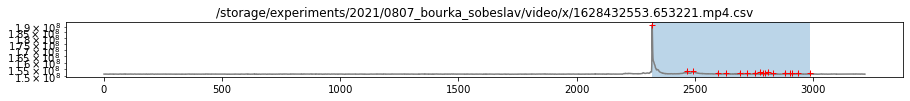

296493.0 151545702.0 151842195.0 151679193.03 47375.003826327506
608991.0 41450799.0
0.615 s


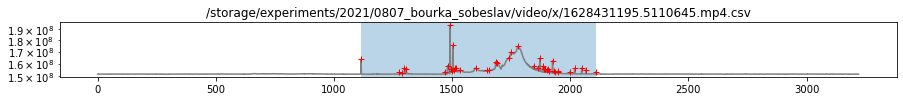

248409.0 151364679.0 151613088.0 151497312.6 46385.56083328283
505950.0 69291300.0
0.605 s


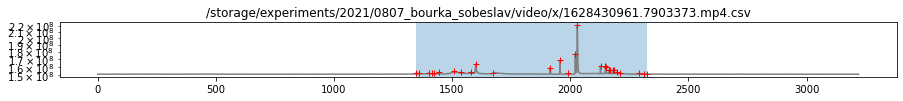

270162.0 151488090.0 151758252.0 151618311.3 54056.0017532323
557538.0 212453166.0
1.35 s


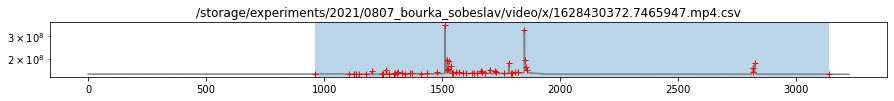

275973.0 151647519.0 151923492.0 151785654.57 56932.1798597323
636582.0 33340023.0
1.115 s


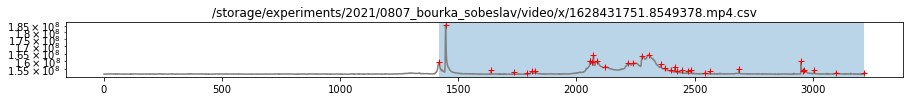

392106.0 151523409.0 151915515.0 151714728.21 58883.18949682574
968118.0 2304324.0
0.382 s


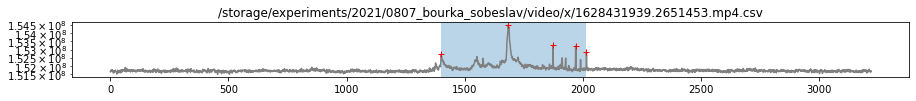

18861.0 101154.0 120015.0 107513.58 1975.0078490062676
47241.0 18306360.0
0.208 s


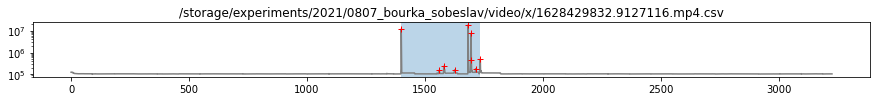

194637.0 151607358.0 151801995.0 151702967.67 45250.90204805565
406815.0 327488922.0
0.859 s


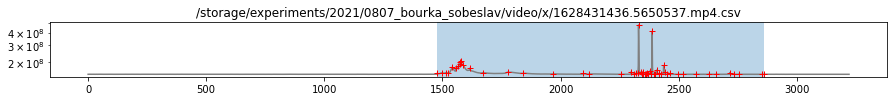

19314.0 98193.0 117507.0 109281.15 2264.3936123868084
44427.0 98772105.0
0.33 s


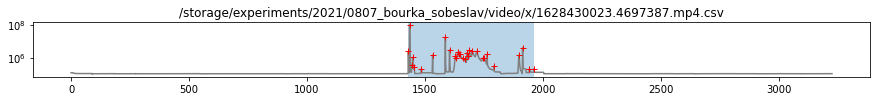

238911.0 151198767.0 151437678.0 151304297.22 46125.95973994372
520797.0 37270980.0
1.236 s


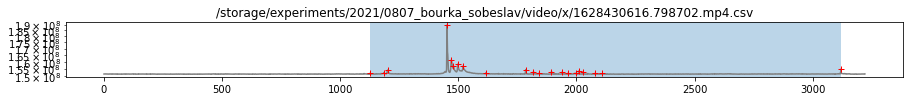

251961.0 151545831.0 151797792.0 151667501.7 54533.78254473426
535887.0 12850377.0
0.667 s


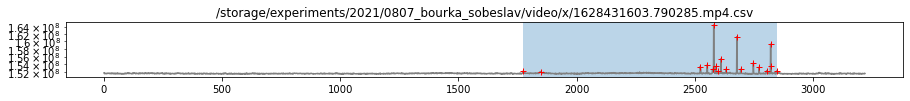

219921.0 151368807.0 151588728.0 151461585.18 44068.28669611413
463842.0 26486802.0
0.566 s


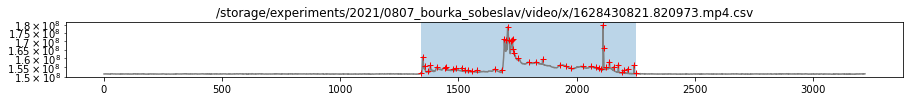

8295.0 106311.0 114606.0 110757.84 2125.1993309719533
23592.0 51461715.0
0.718 s


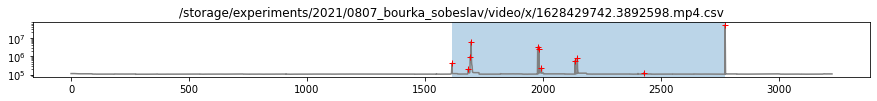

15696.0 103407.0 119103.0 108626.52 1974.338034978721
41481.0 126339873.0
0.465 s


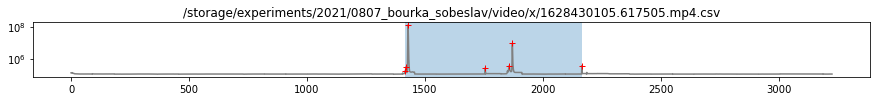

/storage/experiments/2021/0815_bourka_veseli_auto1 620.2000009 False
620853.0 71604549.0 72225402.0 71901132.36 117841.24359283321
1279827.0 27199737.0
0.284 s


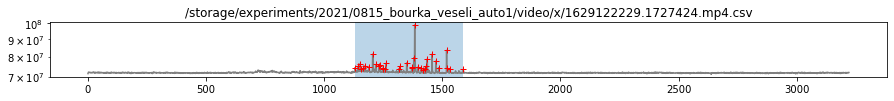

629472.0 60728010.0 61357482.0 61024811.58 138456.9000033913
1258989.0 41093058.0
0.786 s


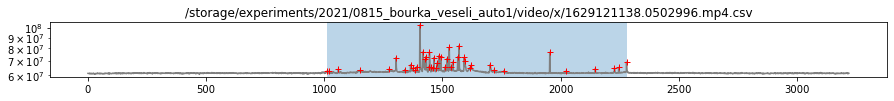

591234.0 70064259.0 70655493.0 70421959.11 113266.3164803561
1291851.0 54868020.0
0.556 s


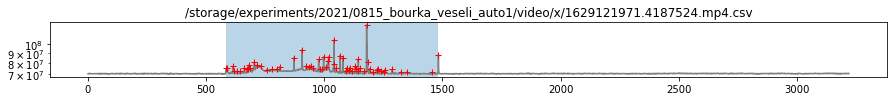

650658.0 56138658.0 56789316.0 56508344.7 146529.68489105793
1376187.0 43639497.0
0.706 s


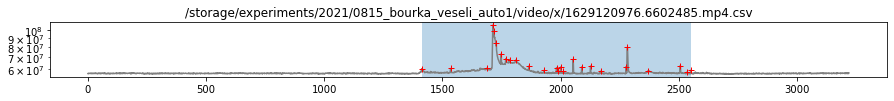

/storage/experiments/2021/0815_bourka_veseli_auto0 620.2000009 False
6342.0 79838.0 86180.0 83440.38 1937.6240307253738
15841.0 43211719.0
0.323 s


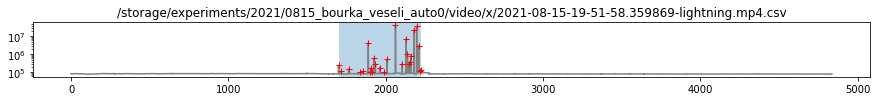

10197.0 79668.0 89865.0 81911.88 1435.2294666074072
29377.0 54166261.0
0.522 s


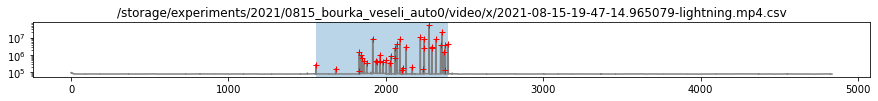

5475.0 77796.0 83271.0 82379.24 626.589197661644
13572.0 284884470.0
0.351 s


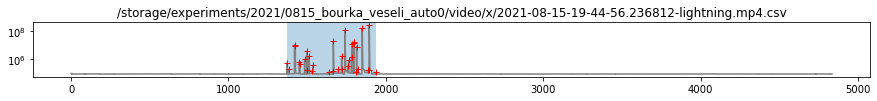

12411.0 77271.0 89682.0 80269.96 1399.1585416408193
33096.0 3196655.0
0.275 s


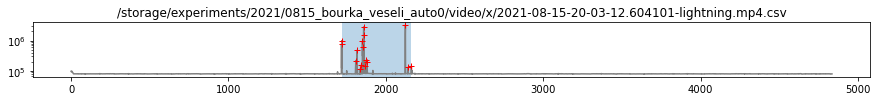

3624.0 77412.0 81036.0 79946.23 568.8252976907139
263880.0 596461.0
0.113 s


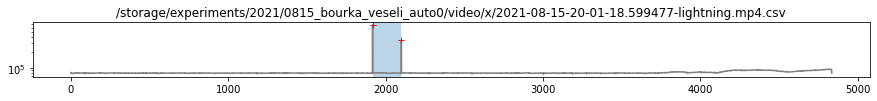

4416.0 77040.0 81456.0 80058.8 623.769171888111
11374.0 93178540.0
0.536 s


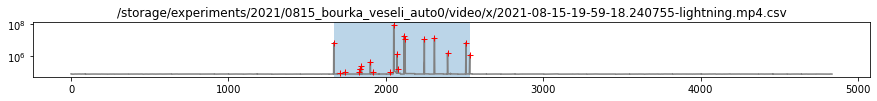

6156.0 77982.0 84138.0 80939.06 745.7497321691126
77110.0 41597400.0
0.441 s


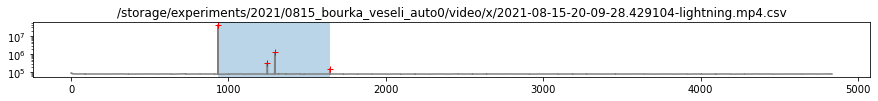

8124.0 83137.0 91261.0 88016.41 1405.102333488831
16577.0 83678149.0
0.258 s


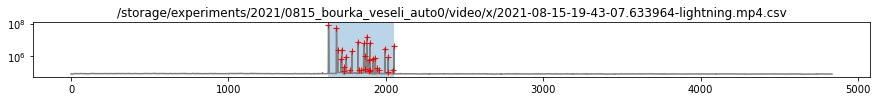

9752.0 78925.0 88677.0 81301.47 1512.9362611835434
27218.0 83425977.0
0.239 s


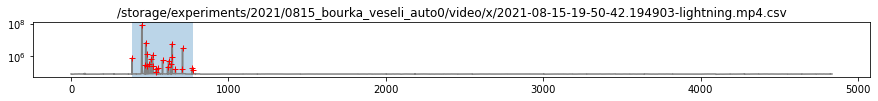

4398.0 79395.0 83793.0 82129.69 858.8473094264725
20128.0 11356021.0
0.408 s


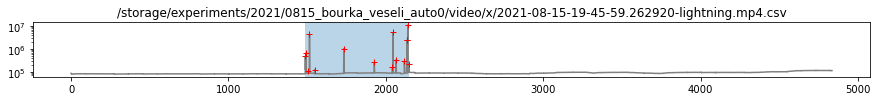

24526.0 82427.0 106953.0 95320.73 5030.846451371055
49191.0 45673551.0
0.333 s


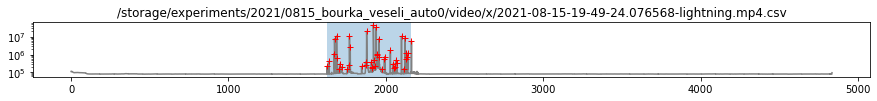

8523.0 78810.0 87333.0 80902.52 1326.3274233534469
29309.0 2069392.0
0.471 s


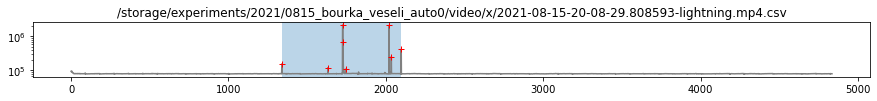

2427.0 78864.0 81291.0 80123.68 591.8955832020893
5148.0 158032.0
0.306 s


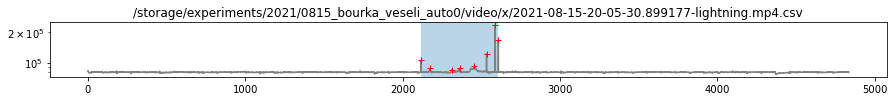

15297.0 77289.0 92586.0 80370.45 1357.2661275185096
31117.0 93671586.0
1.271 s


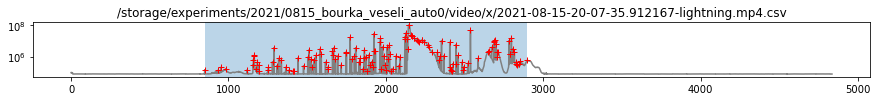

8533.0 74340.0 82873.0 81442.51 924.3241210241515
18244.0 81171719.0
0.618 s


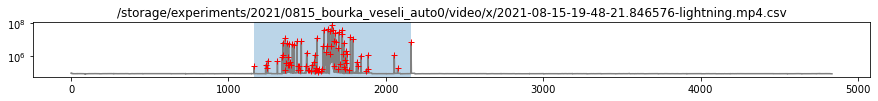

6957.0 77346.0 84303.0 82842.6 1013.7394521116737
14749.0 2578745.0
0.5 s


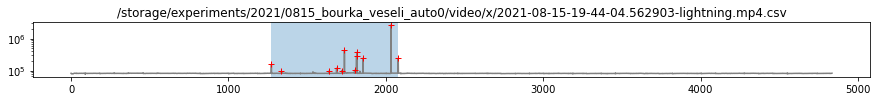

5952.0 79797.0 85749.0 83758.72 635.5581350516276
52573.0 742924.0
0.056 s


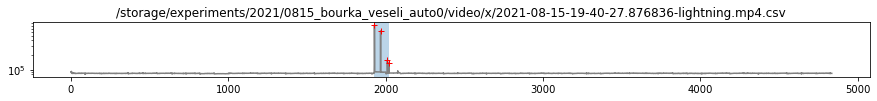

0.015216519647153204 0.0952573676824378 0.110473887329591 0.1027617156174819 0.0021352351914697247
0.03297037890938248 25.392196271050523
0.384 s


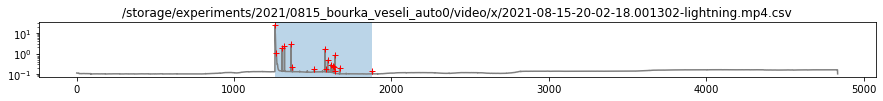

5948.0 79596.0 85544.0 83741.58 1147.130422252224
13489.0 1477466.0
0.582 s


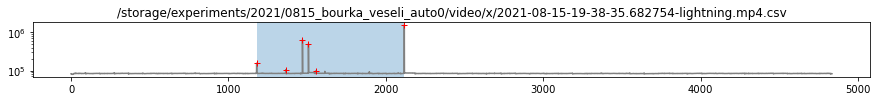

4809.0 78759.0 83568.0 80223.09 858.0386383779548
11514.0 9066135.0
0.407 s


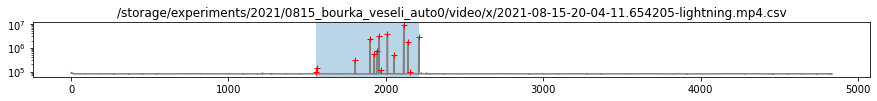

5358.0 79005.0 84363.0 82928.41 562.4280352618322
17217.0 615750.0
0.166 s


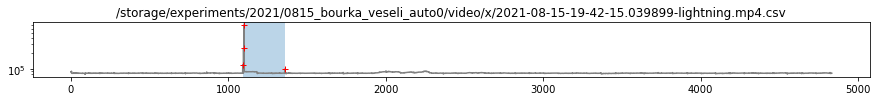

4548.0 86979.0 91527.0 90315.15 640.6524195905865
1177506.0 17000555.0
0.964 s


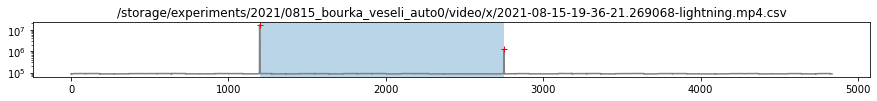

6081.0 78411.0 84492.0 83144.55 1260.6902420355434
12976.0 10336793.0
0.578 s


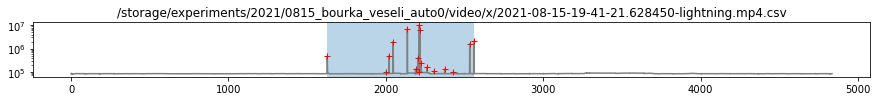

2972.0 77896.0 80868.0 79947.99 504.0474263199823
6442.0 1235415.0
0.301 s


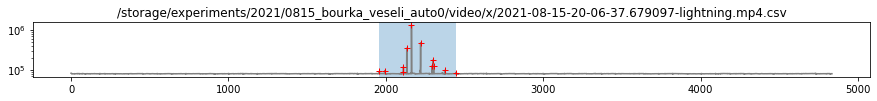

/storage/experiments/2021/0816_bourka_sobeslav 620.2000009 True
113055.0 117722085.0 117835140.0 117791465.67 16811.43417653051
227724.0 1230930.0
0.298 s


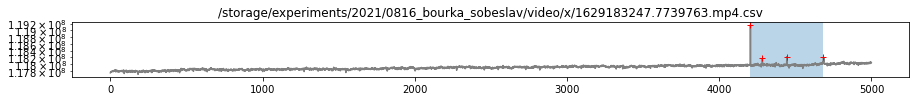

393021.0 106784127.0 107177148.0 106977953.85 85509.8660903843
1290306.0 4013343.0
0.161 s


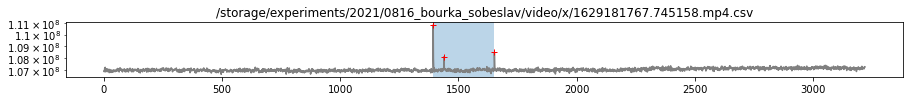

/storage/experiments/2021/0822_bourka_sobeslav_auto0 620.2000009 True
221868.0 88475885.0 88697753.0 88596911.35 48277.47918891228
558512.0 20641588.0
0.259 s


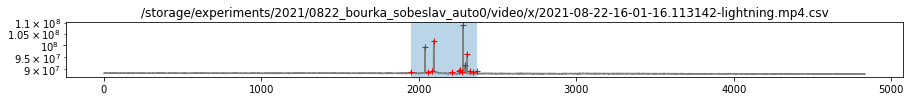

In [2]:
'''
d = [{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009}
#"/storage/experiments/2021/0713_bourka_exit29_D8",\
#"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky
    ]
'''
d = [\
{'dir':"/storage/experiments/2021/0605_bourka_radosovice", 'snap':564.9549943, 'day':True},\
{'dir':"/storage/experiments/2021/0609_bourka_sobeslav", 'snap':348.1999993, 'day':True},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0714_bourka_martin", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0714_bourka_sobeslav", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0725_bourka_ratmirov", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0726_bourka_zabori", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0803_bourka_votice", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0807_bourka_sobeslav", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto1", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto0", 'snap':620.2000009, 'day':False},\
{'dir':"/storage/experiments/2021/0816_bourka_sobeslav", 'snap':620.2000009, 'day':True},\
{'dir':"/storage/experiments/2021/0822_bourka_sobeslav_auto0", 'snap':620.2000009, 'day':True}]
#'''

files = pd.DataFrame( columns=['name', 'duration','bourka'])

WINDOW_SIZE = 100

bourka = 0
for directory in d:
    print(directory['dir'],directory['snap'],directory['day'])

    for f in glob.iglob(directory['dir'] + "/video/x/*.csv"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        ss = f.split('.')
        sss= (ss[0]+'.'+ss[1]).split('/x')
        ff = sss[0]+sss[1]
        
        snap = directory['snap'] 
        
        # Import light curve
        light_curve = pd.read_csv(f, names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        #signal_samples=light_curve[["illuminance"]].to_numpy()
        maximum = max(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        minimum = min(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        amplitude = maximum - minimum
        stddev = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].std()
        avg = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].mean()
        print(amplitude, minimum, maximum, avg, stddev)
        peaks, properties = find_peaks(light_curve["illuminance"], prominence = 2*amplitude, wlen=WINDOW_SIZE)
        #xx = light_curve["illuminance"].rolling(100).mean()
        try:
            print(properties["prominences"].min(), properties["prominences"].max())

            peaks = peaks[peaks > 100]
            files = files.append({'name':f,'duration':round((peaks[-1] - peaks[0]) * snap /1000000, 3),'bourka':bourka, 'day':directory['day']}, ignore_index=True)
            print(round((peaks[-1] - peaks[0]) * snap /1000000, 3), 's')
        except:
            pass        
        
        #peaks, _ = find_peaks(light_curve["illuminance"], prominence = properties["prominences"].max())
        
        try:
            plt.figure(figsize=(15,1))
            plt.yscale('log')
            #plt.plot(signal_samples,c='gray')
            plt.plot(light_curve["illuminance"],c='gray')
            #plt.plot(xx,c='red')
            #plt.ylim(minimum,minimum+(maximum-minimum)/5)
            plt.plot(peaks,light_curve[["illuminance"]].iloc[peaks], ls='', marker='+', color='red')
            plt.axvspan(peaks[0],peaks[-1],alpha=0.3)
            #plt.plot(light_curve["illuminance"].loc[light_curve["illuminance"]>(avg+stddev/2)], color='red')
            #plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
            plt.title(f)
            plt.show()
        except:
            pass
    bourka += 1

flashes 106
median 0.5235000000000001
mean 0.5559056603773584
median night 0.56


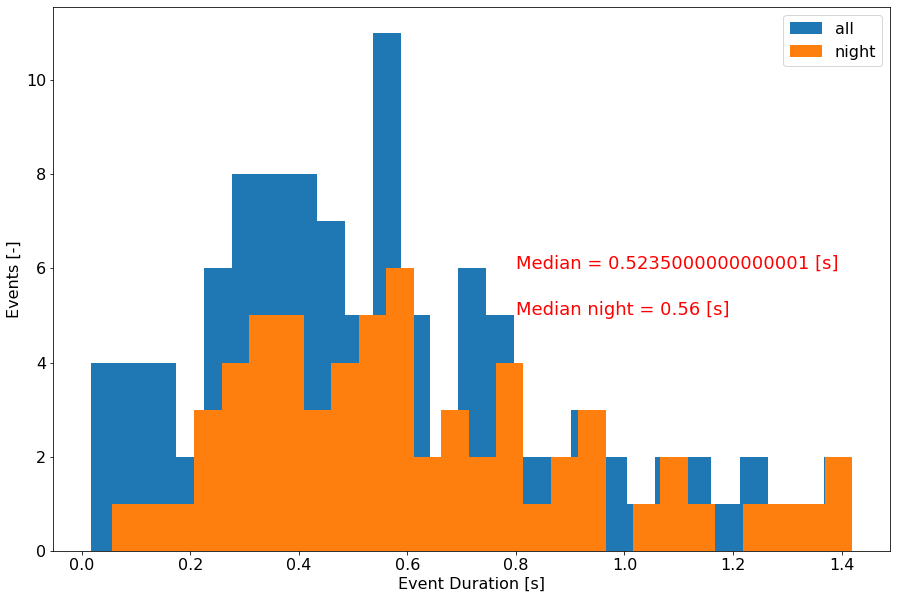

In [30]:
fig = plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 16})

BINS = 27

plt.hist(files.loc[files['duration']>0,'duration'], bins=BINS, label='all')
plt.hist(files.loc[(files['duration']>0) & (files['day']==False),'duration'], bins=BINS, label='night')
#histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
print('flashes', len(files.loc[files['duration']>0]))
plt.xlabel('Event Duration [s]')
plt.ylabel('Events [-]')
print('median',files.loc[files['duration']>0,'duration'].median())
print('mean',files.loc[files['duration']>0,'duration'].mean())
print('median night',files.loc[(files['duration']>0) & (files['day']==False),'duration'].median())
#print(files.loc[files['duration']>0,'duration'].mode())
plt.text(0.8, 6, r'Median = ' + str(files.loc[files['duration']>0,'duration'].median()) + ' [s]', fontsize=18, color='r')
plt.text(0.8, 5, r'Median night = ' + str(files.loc[(files['duration']>0) & (files['day']==False),'duration'].median()) + ' [s]', fontsize=18, color='r')
plt.legend()

flashes 106
median 0.5235000000000001
mean 0.5559056603773584
mode 0    0.306
1    0.363
2    0.416
3    0.465
4    0.571
5    0.754
dtype: float64


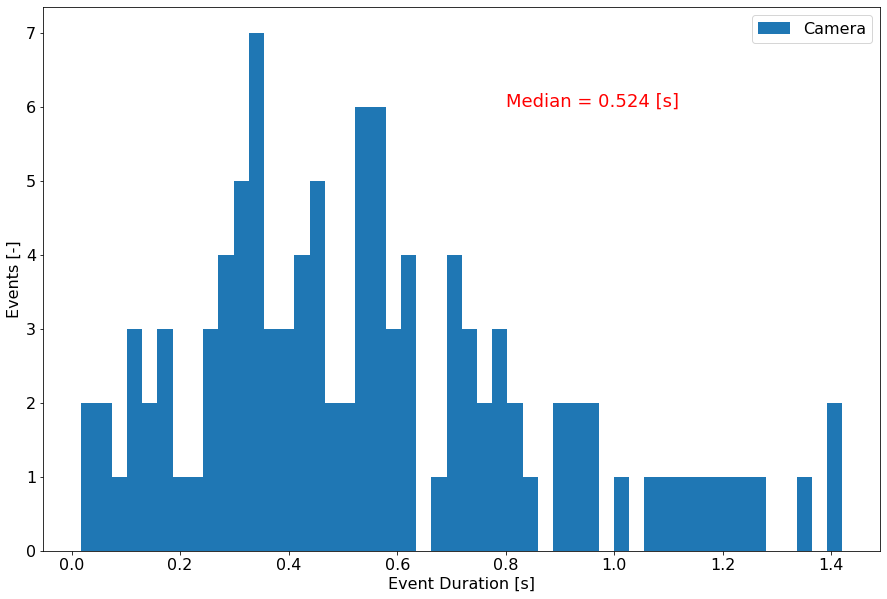

In [3]:
fig = plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 16})

BINS = 50

plt.hist(files.loc[files['duration']>0,'duration'], bins=BINS, label='Camera')
#plt.hist(files.loc[(files['duration']>0) & (files['day']==False),'duration'], bins=BINS, label='night')
#histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
print('flashes', len(files.loc[files['duration']>0]))
plt.xlabel('Event Duration [s]')
plt.ylabel('Events [-]')
print('median', files.loc[files['duration']>0,'duration'].median())
print('mean', files.loc[files['duration']>0,'duration'].mean())
print('mode', files.loc[files['duration']>0,'duration'].mode())
plt.text(0.8, 6, r'Median = ' + str(round(files.loc[files['duration']>0,'duration'].median(),3)) + ' [s]', fontsize=18, color='r')
plt.legend()

In [19]:
for name in files.loc[files['duration']<0.1].name:
    print(name)

/storage/experiments/2021/0605_bourka_radosovice/video/x/vid_2021-06-05_16-52-53.mp4.csv
/storage/experiments/2021/0609_bourka_sobeslav/video/x/vid_2021-06-09_10-38-03.mp4.csv
/storage/experiments/2021/0711_bourka_stiavnica/video/x/vid_2021-07-11_08-43-27.mp4.csv
/storage/experiments/2021/0711_bourka_stiavnica/video/x/vid_2021-07-11_09-50-31.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/x/1628429929.155008.mp4.csv
/storage/experiments/2021/0815_bourka_veseli_auto0/video/x/2021-08-15-19-40-27.876836-lightning.mp4.csv


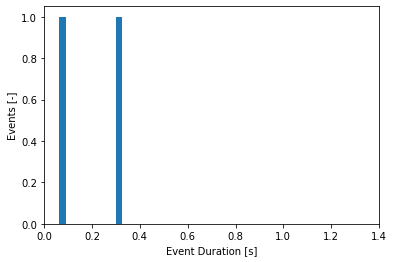

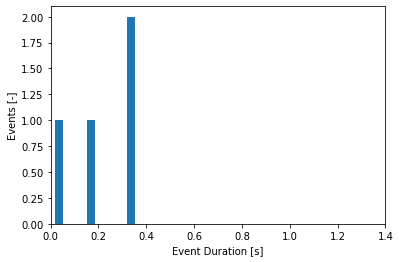

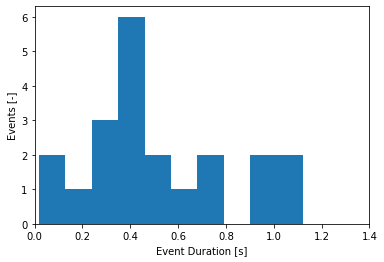

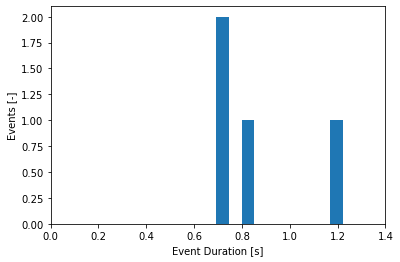

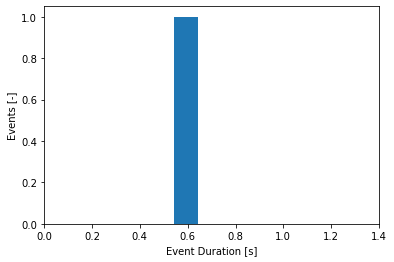

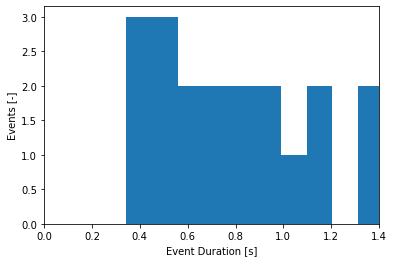

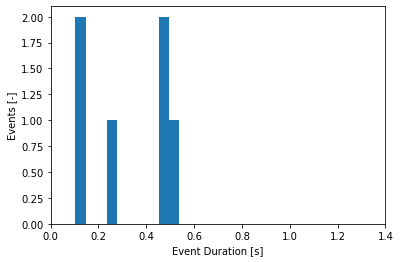

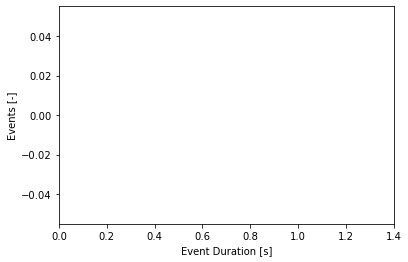

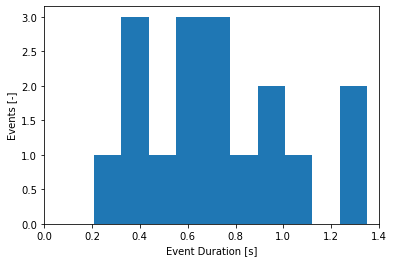

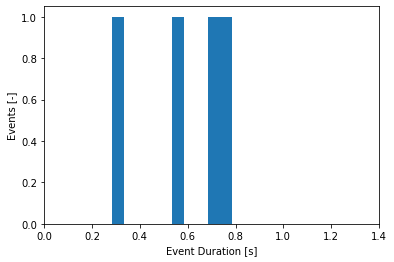

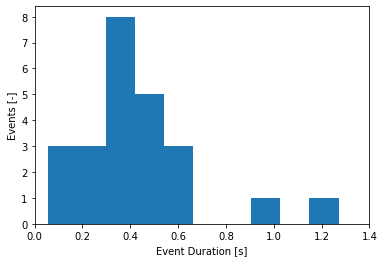

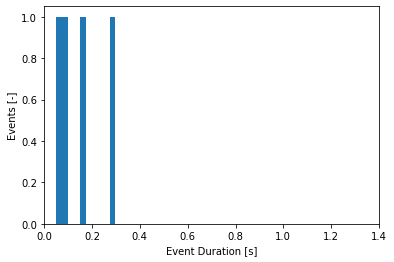

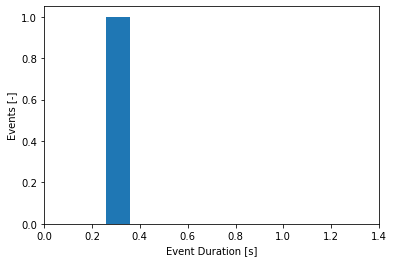

In [210]:
for n in range(bourka):
    plt.hist(files.loc[files['bourka']==n].loc[files['duration']>0,'duration'])
    plt.xlabel('Event Duration [s]')
    plt.ylabel('Events [-]')
    plt.xlim(0,1.4)
    plt.show()
    #files.loc[files['duration']>0,'duration'].median()

In [34]:
'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky

'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]
#'''

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

window_size = 100
threshold = 5

for directory in d:
    print(directory)

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        
        # Import light curve
        light_curve = pd.read_csv(f+'.csv', names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        signal_samples=light_curve[["illuminance"]].to_numpy()
        if len(signal_samples) > 0:
            start_sample = signal_samples[:window_size]
            start_noise_std = np.nanstd(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            start_noise_mean = np.nanmean(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            
            end_sample = signal_samples[-window_size:]
            end_noise_std = np.nanstd(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            end_noise_mean = np.nanmean(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            #print(start_noise_std, start_noise_mean, end_noise_std,end_noise_mean)


            for sample_num in range(0,len(signal_samples)):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / start_noise_std
                if z_score > threshold:
                    event_start = sample_num
                    break

            for sample_num in reversed(range(0,len(signal_samples))):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / end_noise_std
                if z_score > threshold:
                    event_end = sample_num
                    break
            '''
            try:
                plt.figure(figsize=(15,1))
                plt.tight_layout()
                plt.plot(signal_samples,c='gray')
                plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
                plt.show()
            except:
                pass
            '''

        else:
            event_start = float("NaN")
            event_end = float("NaN")
        
        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length, 'event_start':event_start, 'event_end':event_end}, ignore_index=True)
        vcap.release()
files

/storage/experiments/2021/0605_bourka_radosovice
/storage/experiments/2021/0609_bourka_sobeslav
/storage/experiments/2021/0711_bourka_stiavnica
/storage/experiments/2021/0714_bourka_martin
/storage/experiments/2021/0714_bourka_sobeslav
/storage/experiments/2021/0725_bourka_ratmirov
/storage/experiments/2021/0726_bourka_zabori
/storage/experiments/2021/0803_bourka_votice
/storage/experiments/2021/0807_bourka_sobeslav
/storage/experiments/2021/0815_bourka_veseli_auto1
/storage/experiments/2021/0815_bourka_veseli_auto0
/storage/experiments/2021/0816_bourka_sobeslav
/storage/experiments/2021/0822_bourka_sobeslav_auto0


,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9520.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,1055.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,4516.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4149.0,3076.0
...,...,...,...,...,...,...
191,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1649.0,485.0
192,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,1683.0,462.0
193,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1683.0,462.0
194,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN


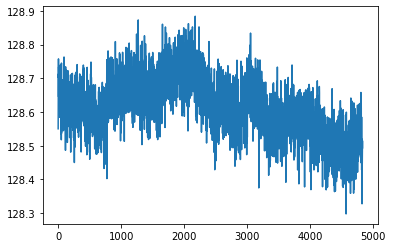

In [83]:
plt.plot(light_curve['frame'],light_curve['illuminance'])

In [84]:
light_curve

,frame,illuminance
0,0,128.550090
1,1,128.662144
2,2,128.653799
3,3,128.712568
4,4,128.702863
...,...,...
4828,4828,128.450104
4829,4829,128.477717
4830,4830,128.483539
4831,4831,128.514541


In [85]:
files

,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9918.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,10061.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,7371.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4125.0,3076.0
...,...,...,...,...,...,...
201,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,2366.0,485.0
202,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,4277.0,1115.0
203,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,4277.0,1457.0
204,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN
